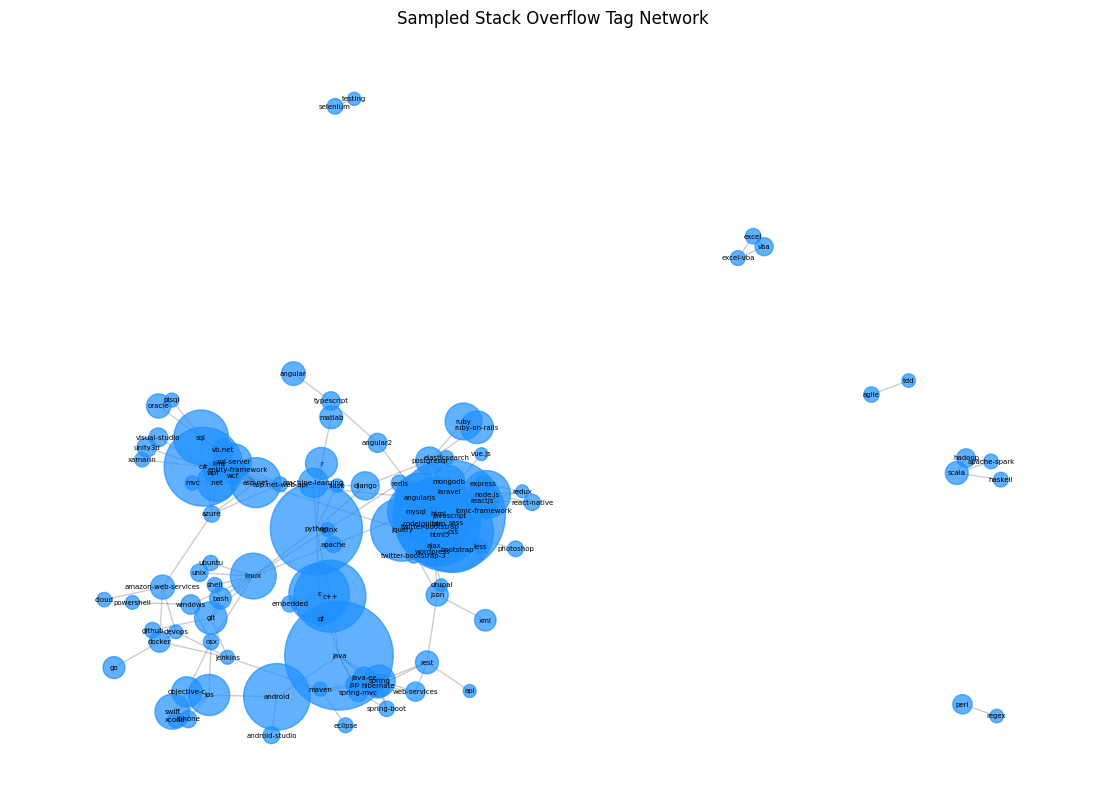

In [9]:
import pandas as pd

links_df = pd.read_csv('stack_network_links.csv')
nodes_df = pd.read_csv('stack_network_nodes.csv')
(links_df.head(), nodes_df.head())

import networkx as nx
import matplotlib.pyplot as plt

sampled_edges = links_df.sample(n=min(500, len(links_df)), random_state=1)
sampled_G = nx.from_pandas_edgelist(sampled_edges, 'source', 'target', ['value'])
node_sizes = nodes_df.set_index('name').to_dict()['nodesize']
sampled_node_sizes = [node_sizes[node]*10 if node in node_sizes else 100 for node in sampled_G.nodes]

plt.figure(figsize=(14, 10))
sampled_pos = nx.spring_layout(sampled_G, k=0.1, iterations=50)

nx.draw_networkx_nodes(sampled_G, sampled_pos, alpha=0.7, node_size=sampled_node_sizes, node_color='dodgerblue')
nx.draw_networkx_edges(sampled_G, sampled_pos, alpha=0.2)
nx.draw_networkx_labels(sampled_G, sampled_pos, font_size=5, font_color='black')

plt.title('Sampled Stack Overflow Tag Network')
plt.axis('off') 
plt.show()



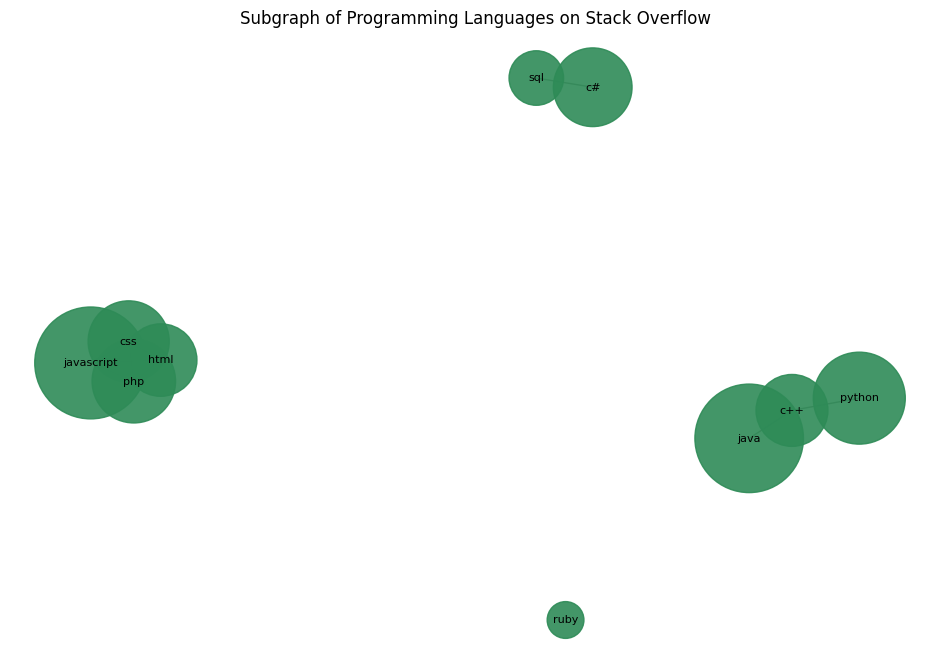

In [10]:
common_langs = ['javascript', 'java', 'c#', 'python', 'php', 'ruby', 'c++', 'css', 'html', 'sql']

lang_nodes_df = nodes_df[nodes_df['name'].str.lower().isin(common_langs)]

programming_lang_subgraph = sampled_G.subgraph(lang_nodes_df['name'])

plt.figure(figsize=(12, 8))
lang_pos = nx.spring_layout(programming_lang_subgraph, k=0.3, iterations=40)

nx.draw_networkx_nodes(programming_lang_subgraph, lang_pos, alpha=0.9, 
                       node_size=[node_sizes[node]*10 for node in programming_lang_subgraph.nodes], 
                       node_color='seagreen')
nx.draw_networkx_edges(programming_lang_subgraph, lang_pos, alpha=0.5)
nx.draw_networkx_labels(programming_lang_subgraph, lang_pos, font_size=8, font_color='black')

plt.title('Subgraph of Programming Languages on Stack Overflow')
plt.axis('off')
plt.show()


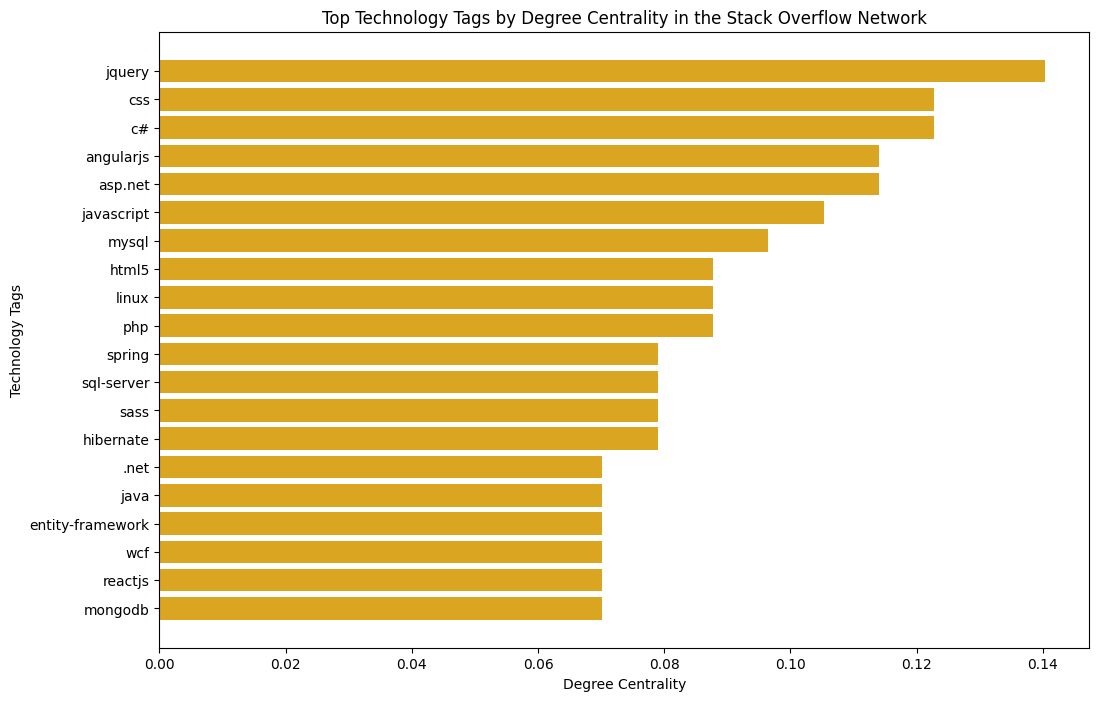

In [11]:
degree_centrality = nx.degree_centrality(sampled_G)

degree_centrality_df = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'DegreeCentrality'])

degree_centrality_df = degree_centrality_df.merge(nodes_df, left_on='Node', right_on='name', how='left')
degree_centrality_df.sort_values('DegreeCentrality', ascending=False, inplace=True)

top_centrality_nodes = degree_centrality_df.head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_centrality_nodes['Node'], top_centrality_nodes['DegreeCentrality'], color='goldenrod')
plt.xlabel('Degree Centrality')
plt.ylabel('Technology Tags')
plt.title('Top Technology Tags by Degree Centrality in the Stack Overflow Network')
plt.gca().invert_yaxis()
plt.show()
